In [1]:
import pandas as pd
from plotnine import *
from plotnine.data import *
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, precision_recall_curve
import numpy as np

df = pd.read_csv('data/cliqueData/politics_full.csv')
df['remainsValidFull'] = df['remainsValidPercentage']==1.0
#filter out singletons:
df = df[df['cliqueSize']>1]
print(df.dtypes)
print(df)
print(df.describe())



ComponentID                        object
Method                             object
cliqueID                            int64
cliqueSize                          int64
remainsValidPercentage            float64
avgEvidencePerEdge                float64
fractionOfVerticesWithEvidence    float64
score                             float64
remainsValidFull                     bool
dtype: object
      ComponentID                        Method  cliqueID  cliqueSize  \
2           33773                         MDMCP     33810          13   
5           33773                         MDMCP     33821           2   
7           11708                         MDMCP     11708          18   
12            137                         MDMCP     22072           2   
13            137                         MDMCP      2133          30   
...           ...                           ...       ...         ...   
20189           -  greedyLargeVertexCountResult      7974           2   
20190           -  greed

In [8]:
print("Methods",df['Method'].unique())
print(df.groupby('Method').size())


Methods ['MDMCP' 'bruteForceResult' 'greedyLargeVertexCountResult']
Method
MDMCP                            942
bruteForceResult                2862
greedyLargeVertexCountResult    2150
dtype: int64


# Average and Total Score

In [15]:
dfGreedy = df[df['Method']=='greedy']
dfMDMCP = df[df['Method']=='MDMCP']
print("Greedy score: mean",dfGreedy['score'].mean(), "Sum", dfGreedy['score'].sum(), "count", len(dfMDMCP.index))
print("MDMCP score: mean",dfMDMCP['score'].mean(), "Sum", dfMDMCP['score'].sum(),"count",len(dfMDMCP.index) )

#print(dfMDMCP['score'].mean())
#print(mean(dfMDMCP.mean()'score']))

Greedy score: mean nan Sum 0.0 count 942
MDMCP score: mean 0.4675985349830392 Sum 440.47781995402295 count 942


# Accuracy
Accuracy is 100% - that might hint at a bug but could also be true, remember the following statistics on edges:
Total Row Count is 575801 of which  322618 are valid (strict) -  56.02942683322884 %
Keep in mind that we selected less than 6000 of those (with a pretty high score), so the likelihood that all of these are correct might actually not be very low (?)

In [14]:
#overall accuracy:
truth=df['remainsValidFull']
df['predicted']=True
predicted=df['predicted']
accuracy_score(truth, predicted)
df['cliqueSize'].sum()
df['edgeCount'] = df['cliqueSize']*(df['cliqueSize']-1) / 2
df['edgeCount'].sum()

42717.0

2                               MDMCP
5                               MDMCP
7                               MDMCP
12                              MDMCP
13                              MDMCP
                     ...             
20189    greedyLargeVertexCountResult
20190    greedyLargeVertexCountResult
20195    greedyLargeVertexCountResult
20196    greedyLargeVertexCountResult
20199    greedyLargeVertexCountResult
Name: Method, Length: 5954, dtype: object


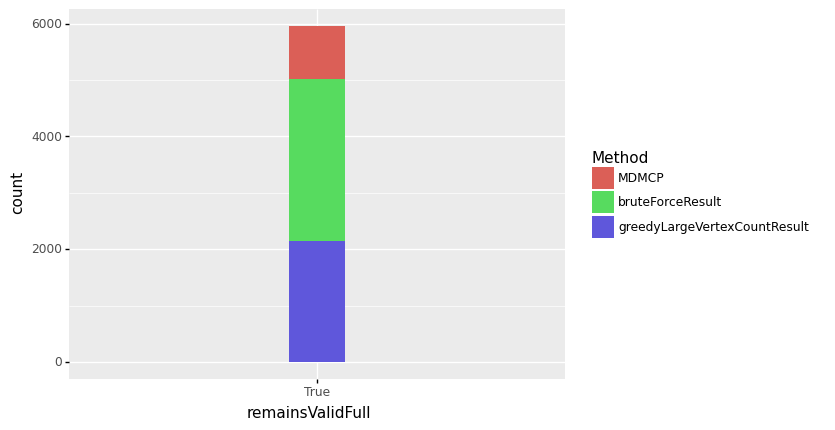

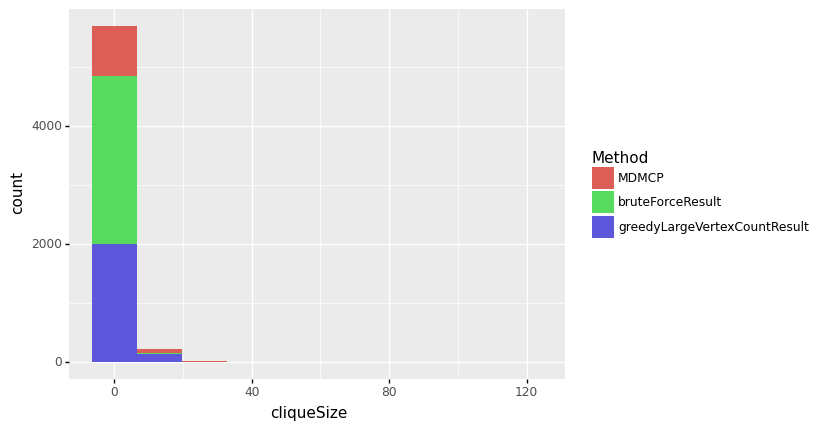

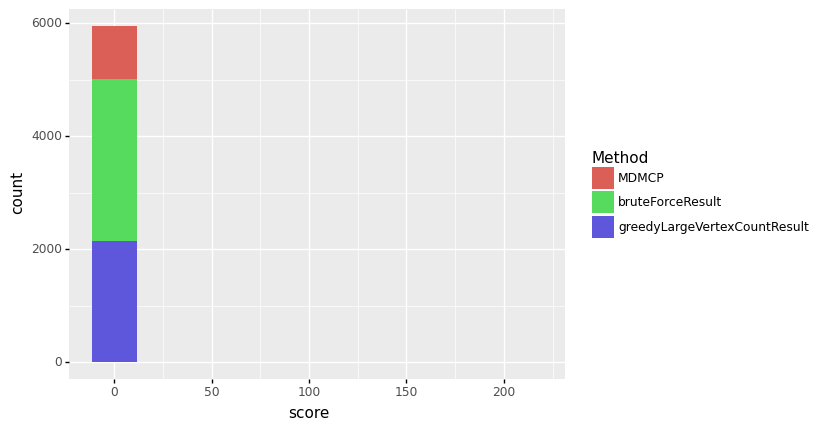

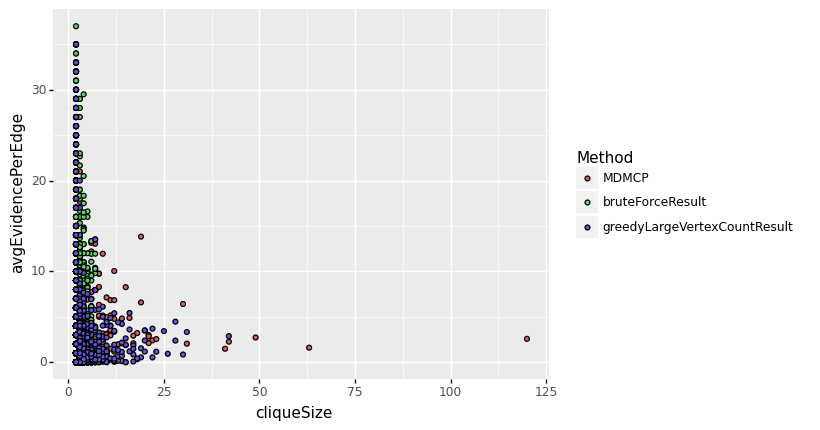

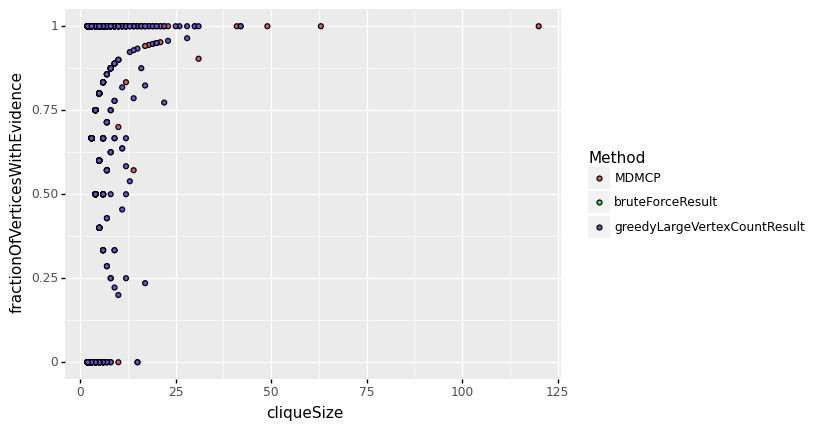

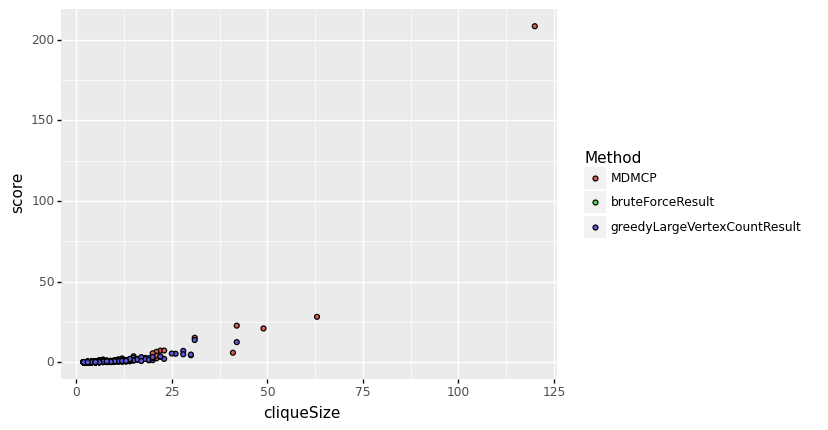

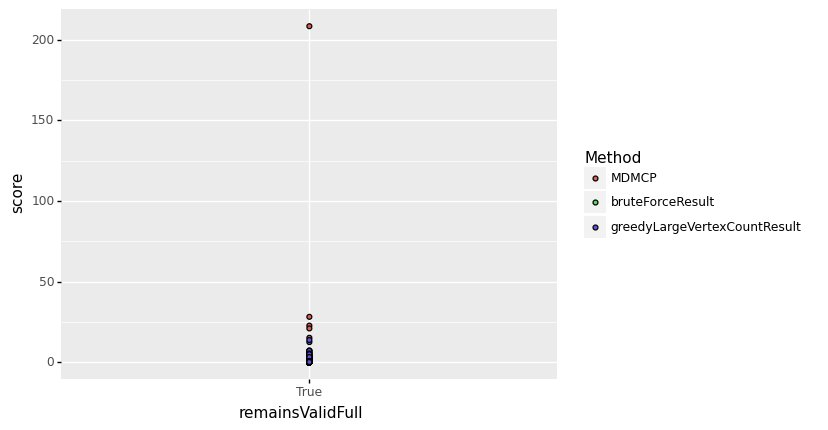

In [6]:
from plotnine import *
from plotnine.data import *

print(df['Method'])
#print(ggplot(df,aes_string(x=Method, y=cliqueSize)) +geom_bar())
print(ggplot(df, aes(x='remainsValidFull', y=after_stat('count'),fill='Method')) + geom_histogram(bins=10))
print(ggplot(df, aes(x='cliqueSize', y=after_stat('count'),fill='Method')) + geom_histogram(bins=10))
print(ggplot(df, aes(x='score', y=after_stat('count'),fill='Method')) + geom_histogram(bins=10))
print(ggplot(df, aes(x='cliqueSize', y='avgEvidencePerEdge',fill='Method')) + geom_point())
print(ggplot(df, aes(x='cliqueSize', y='fractionOfVerticesWithEvidence',fill='Method')) + geom_point())
print(ggplot(df, aes(x='cliqueSize', y='score',fill='Method')) + geom_point())
print(ggplot(df, aes(x='remainsValidFull', y='score',fill='Method')) + geom_point())